In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [8]:
data = pd.read_csv ("laptop_price - dataset.csv")
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
data.shape

(1275, 15)

In [10]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [11]:
data.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [15]:
data.nunique()

Company                 19
Product                618
TypeName                 6
Inches                  18
ScreenResolution        40
CPU_Company              3
CPU_Type                93
CPU_Frequency (GHz)     25
RAM (GB)                 9
Memory                  39
GPU_Company              4
GPU_Type               106
OpSys                    9
Weight (kg)            171
Price (Euro)           791
dtype: int64

In [16]:
X = data.drop('Price (Euro)', axis=1)
y = data['Price (Euro)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [18]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
models = {
    'CatBoostRegressor': CatBoostRegressor(n_estimators=100, random_state=0, verbose=False),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=0),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=0),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=100, random_state=0),
    'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=100, random_state=0),
    'BaggingRegressor': BaggingRegressor(n_estimators=100, random_state=0),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'XGBRegressor': XGBRegressor(n_estimators=100, random_state=0),
    'LGBMRegressor': LGBMRegressor(n_estimators=100, random_state=0, verbose=-1)
}

In [24]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    results[name] = {'MAE': mae, 'R2': r2, 'MSE': mse, 'RMSE': rmse}
    print(f'{name}: MAE = {mae}, R2 Score = {r2}, MSE = {mse}, RMSE = {rmse}')

CatBoostRegressor: MAE = 201.69481900604367, R2 Score = 0.8266232314286852, MSE = 101495.81880051289, RMSE = 318.58408434903475
RandomForestRegressor: MAE = 198.00461773202616, R2 Score = 0.8155882007554816, MSE = 107955.79312634013, RMSE = 328.5662690026779
GradientBoostingRegressor: MAE = 215.12768647042023, R2 Score = 0.8155343677431713, MSE = 107987.30730040128, RMSE = 328.6142226082147
AdaBoostRegressor: MAE = 420.9763331188403, R2 Score = 0.5639948471990245, MSE = 255240.0782955841, RMSE = 505.21290392821925
ExtraTreesRegressor: MAE = 213.69723470588232, R2 Score = 0.7606615414143079, MSE = 140110.1948362565, RMSE = 374.312963756609
BaggingRegressor: MAE = 196.16981713071897, R2 Score = 0.8169795733807593, MSE = 107141.27509706272, RMSE = 327.3244187301991
LinearRegression: MAE = 240.82025306419442, R2 Score = 0.680967114343745, MSE = 186763.79898413547, RMSE = 432.16177408944384
SVR: MAE = 520.2900416034504, R2 Score = -0.006883375717967599, MSE = 589435.6752478294, RMSE = 767.7

In [25]:
param_grids = {
    'CatBoostRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1],
        'depth': [3, 5, 7]
    },
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'BaggingRegressor': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

In [26]:
for model_name, model in models.items():
    if model_name not in param_grids:
        continue

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    preds = grid_search.best_estimator_.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{model_name} - Best Params: {grid_search.best_params_}")
    print(f"{model_name} - Mean Absolute Error: {mae}, R2 Score: {r2}")

CatBoostRegressor - Best Params: {'depth': 7, 'learning_rate': 0.1, 'n_estimators': 300}
CatBoostRegressor - Mean Absolute Error: 193.7458704026702, R2 Score: 0.8287902369719957
RandomForestRegressor - Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestRegressor - Mean Absolute Error: 196.58212284220357, R2 Score: 0.8140767573727219
GradientBoostingRegressor - Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
GradientBoostingRegressor - Mean Absolute Error: 187.10485144718808, R2 Score: 0.8293447791453258
BaggingRegressor - Best Params: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
BaggingRegressor - Mean Absolute Error: 198.88023196075198, R2 Score: 0.7885902715782606
XGBRegressor - Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
XGBRegressor - Mean Absolute Error: 186.18584344602098, R2 Score: 0.8657266055903562


In [27]:
def plot_feature_importance(model, num_features=10):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = preprocessor.get_feature_names_out()
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 8))
        plt.title("Feature Importances")
        plt.bar(range(num_features), importances[indices][:num_features], align="center")
        plt.xticks(range(num_features), np.array(feature_names)[indices][:num_features], rotation=90)
        plt.xlim([-1, num_features])
        plt.show()

In [28]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

In [29]:
def plot_prediction_vs_actual(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='r', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Prediction vs Actual')
    plt.show()

In [30]:
def plot_error_distribution(y_true, y_pred):
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, bins=30)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Distribution')
    plt.show()

In [31]:
def plot_model_comparison(results):
    names = list(results.keys())
    mae_scores = [results[name]['MAE'] for name in names]
    r2_scores = [results[name]['R2'] for name in names]

    x = np.arange(len(names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))
    bars1 = ax.bar(x - width/2, mae_scores, width, label='MAE')
    bars2 = ax.bar(x + width/2, r2_scores, width, label='R2 Score')

    ax.set_xlabel('Models')
    ax.set_title('Model Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')
    ax.legend()

    plt.show()

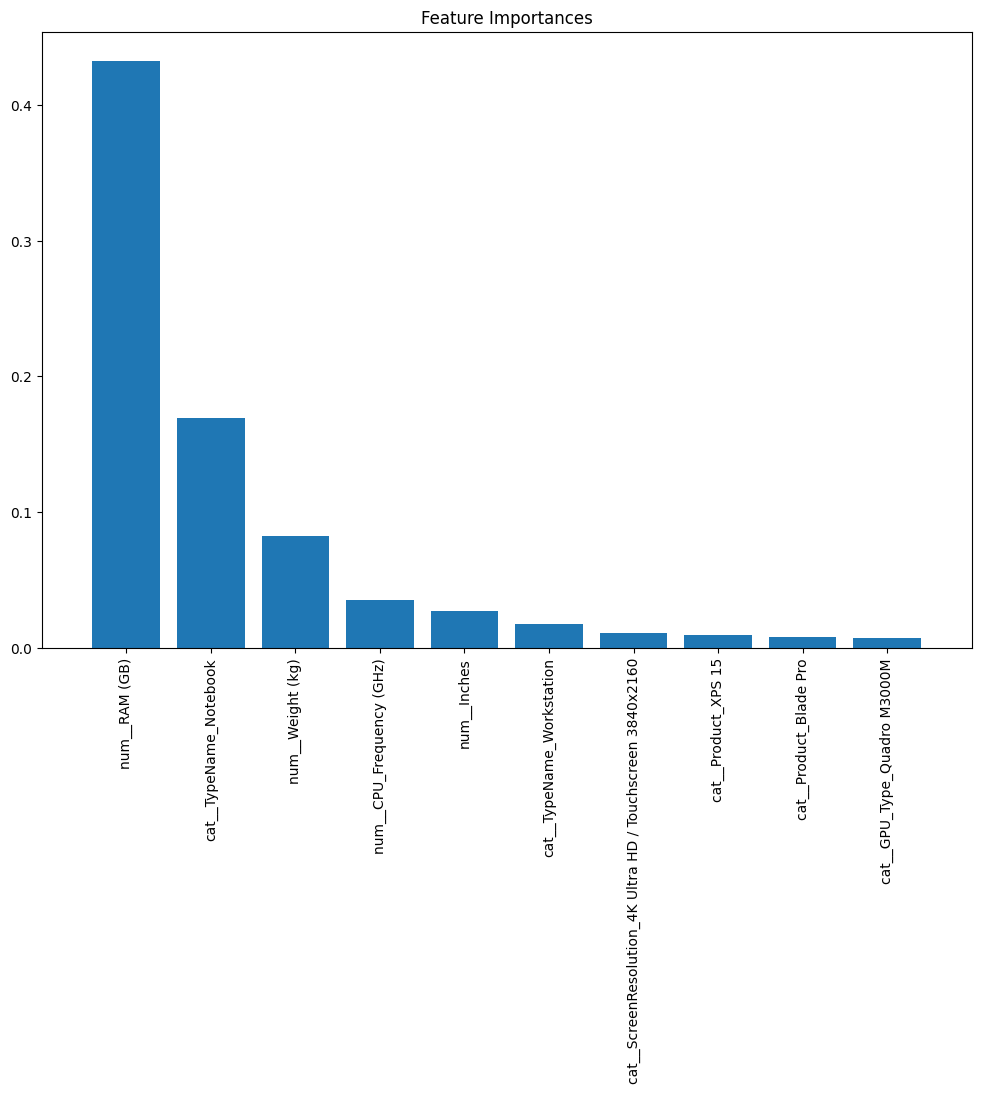

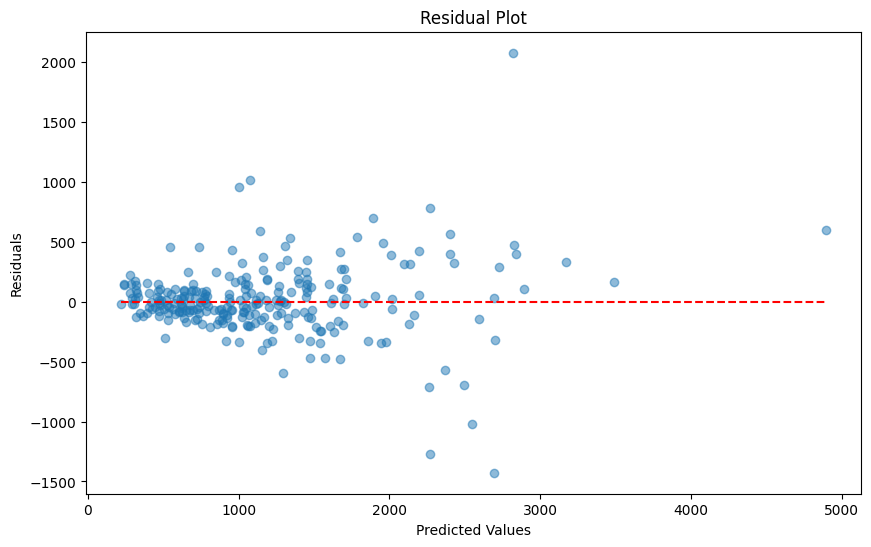

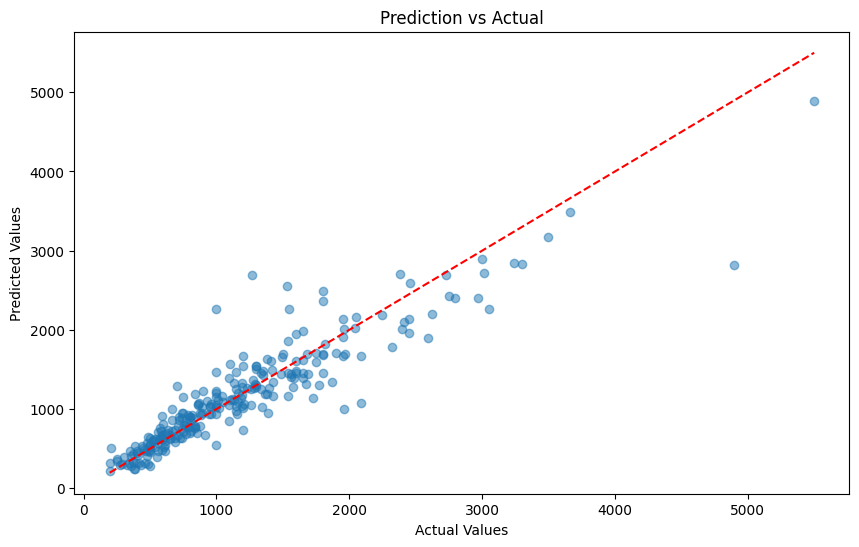

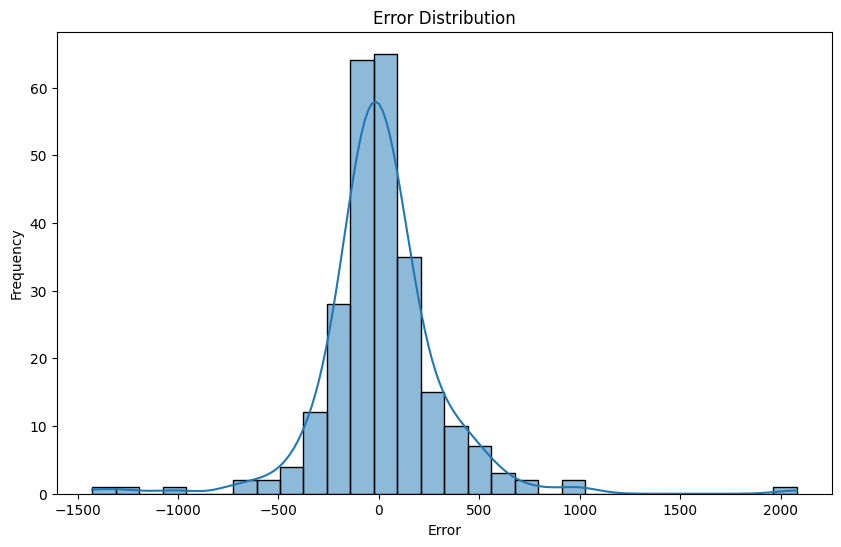

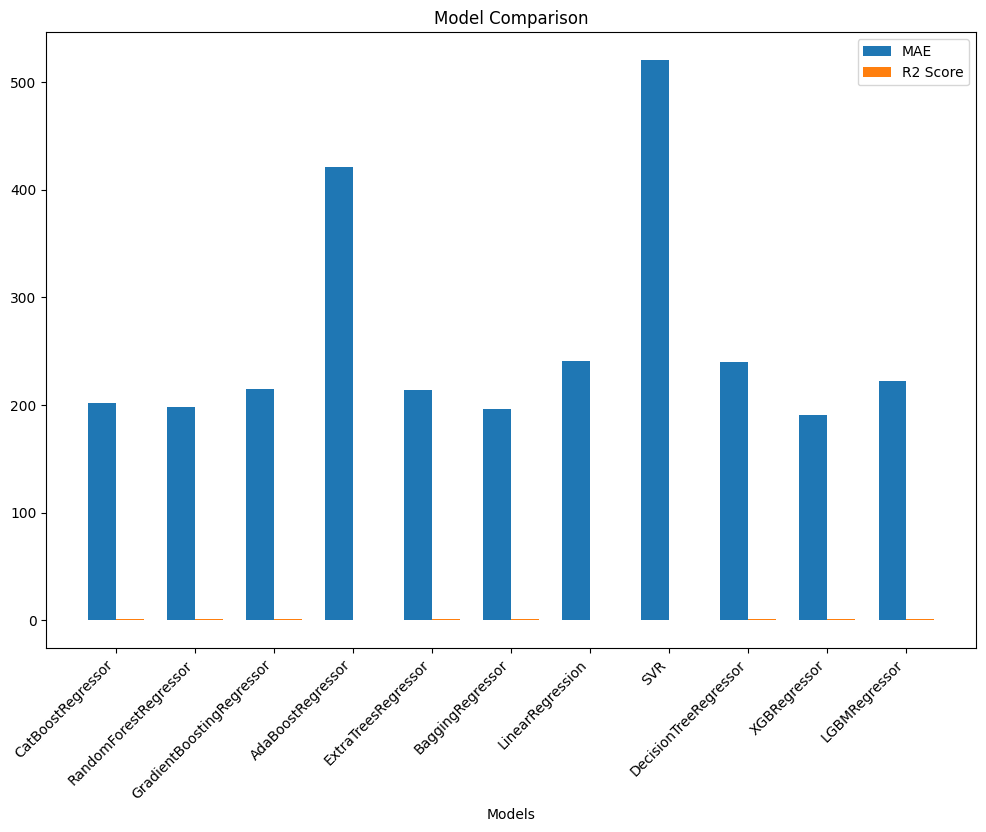

In [33]:
best_model = 'XGBRegressor'
model = models[best_model]
y_pred_best = model.predict(X_test)

plot_feature_importance(models['RandomForestRegressor'])
plot_residuals(y_test, y_pred_best)
plot_prediction_vs_actual(y_test, y_pred_best)
plot_error_distribution(y_test, y_pred_best)
plot_model_comparison(results)